<a href="https://colab.research.google.com/github/fataik1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/FataiKingSampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [70]:
# TODO - your code!
import numpy as np
import pandas as pd
import scipy.stats



df = pd.read_csv('house-votes-84.data', names = ['party', 'handicapped-infants', 'water-project', 'budget',
                                                 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 'anti-satellite-ban',
                                                 'aid-to-contras', 'mx-missle', 'immigration', 'synfuels', 
                                                 'education', 'right-to-sue' ,'crime', 'duty-free', 'south-africa'])

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missle,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df.describe()

In [0]:
df.shape

(435, 17)

In [3]:
df = df.replace({"y": 1, "n": 0, "?": np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missle,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [14]:
df.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missle               0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [13]:
df.describe(exclude='number')

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missle,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [15]:
df['water-project'].value_counts()

y    195
n    192
?     48
Name: water-project, dtype: int64

In [16]:
df['crime'].value_counts()

y    248
n    170
?     17
Name: crime, dtype: int64

In [17]:
contingency_table = pd.crosstab(df['water-project'], df['crime'], margins=True)

contingency_table

crime,?,n,y,All
water-project,,,,
?,4,21,23,48
n,3,74,115,192
y,10,75,110,195
All,17,170,248,435


expected value

In [32]:
row_sums = contingency_table.iloc[0:3, 3].values
col_sums = contingency_table.iloc[2, 0:3].values

print(row_sums)
print(col_sums)

[ 48 192 195]
[ 10  75 110]


In [0]:
total_total = df.shape[0]

In [33]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected) 

(3, 3)
[[ 1.10344828  8.27586207 12.13793103]
 [ 4.4137931  33.10344828 48.55172414]
 [ 4.48275862 33.62068966 49.31034483]]


In [34]:
# Get a crosstab without the margins:

observed = pd.crosstab(df['water-project'], df['crime']).values
print(observed.shape)
observed

(3, 3)


array([[  4,  21,  23],
       [  3,  74, 115],
       [ 10,  75, 110]])

In [35]:
# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")# Array broadcasting will work with numpy arrays but not python lists
chi_squared = ((observed - expected)**2/(expected)).sum() 
print(f"Chi-Squared: {chi_squared}")

Chi-Squared: 311.219696969697
Chi-Squared: 311.219696969697


In [99]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 7.141174931123193
P-value: 0.12861321388187236
Degrees of Freedom: 4
Expected: 
 [[  1.87586207  18.75862069  27.36551724]
 [  7.50344828  75.03448276 109.46206897]
 [  7.62068966  76.20689655 111.17241379]]


#2

In [44]:
df['crime'] = np.random.binomial(n=1, p=.5, size=435)
df['crime']

0      1
1      1
2      0
3      0
4      1
      ..
430    1
431    0
432    1
433    0
434    1
Name: crime, Length: 435, dtype: int64

In [45]:
.5**435

1.1270725851789228e-131

In [49]:
df['crime'] = np.random.binomial(n=1, p=.5, size=435)
df['crime'].mean()

0.4804597701149425

In [51]:
sample_means = []
for x in range(0,3000):
  df['crime'] = np.random.binomial(n=1, p=.5, size=435)
  one_sample = df['crime']
  sample_means.append(df['crime'].mean())

print(len(sample_means))
print(sample_means)

3000
[0.4896551724137931, 0.49885057471264366, 0.4413793103448276, 0.4942528735632184, 0.5218390804597701, 0.48735632183908045, 0.4942528735632184, 0.5402298850574713, 0.5241379310344828, 0.4689655172413793, 0.5310344827586206, 0.5149425287356322, 0.4689655172413793, 0.5126436781609195, 0.5126436781609195, 0.5172413793103449, 0.4827586206896552, 0.503448275862069, 0.5379310344827586, 0.496551724137931, 0.5218390804597701, 0.49885057471264366, 0.5333333333333333, 0.496551724137931, 0.46206896551724136, 0.4850574712643678, 0.4781609195402299, 0.5218390804597701, 0.5057471264367817, 0.5218390804597701, 0.496551724137931, 0.503448275862069, 0.5103448275862069, 0.47586206896551725, 0.4850574712643678, 0.5057471264367817, 0.5149425287356322, 0.5103448275862069, 0.5126436781609195, 0.496551724137931, 0.5080459770114942, 0.5218390804597701, 0.5172413793103449, 0.4850574712643678, 0.5195402298850574, 0.46206896551724136, 0.5195402298850574, 0.5080459770114942, 0.5609195402298851, 0.540229885057

In [52]:
df = pd.DataFrame({'single_sample': one_sample})
df.head()

,single_sample
0,1
1,0
2,1
3,0
4,1


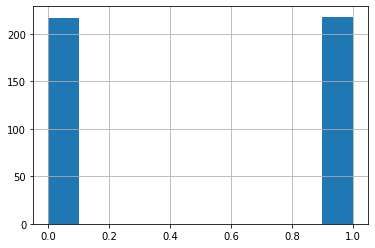

In [53]:
df.single_sample.hist();

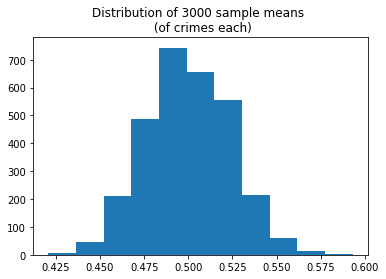

In [54]:
import matplotlib.pyplot as plt
ax = plt.hist(sample_means, bins=11)
plt.title('Distribution of 3000 sample means \n (of crimes each)');

3

In [58]:
sample_means_small = []
sample_means_large = []
for x in range(0,3000):
  df['crime'] = np.random.binomial(n=1, p=.5, size=435)
  df['crime']= np.random.binomial(n=1, p=.5, size=435)
  one_small_sample = df['crime']
  one_small_large = df['crime']
  sample_means_small.append(df['crime'].mean())
  sample_means_large.append(df['crime'].mean())

print(len(sample_means_small))
print(sample_means_small)

3000
[0.4896551724137931, 0.496551724137931, 0.4827586206896552, 0.5011494252873563, 0.49195402298850577, 0.5540229885057472, 0.47126436781609193, 0.4666666666666667, 0.5310344827586206, 0.5402298850574713, 0.503448275862069, 0.5149425287356322, 0.503448275862069, 0.5172413793103449, 0.4850574712643678, 0.5103448275862069, 0.5195402298850574, 0.5103448275862069, 0.4942528735632184, 0.5149425287356322, 0.5011494252873563, 0.5080459770114942, 0.5287356321839081, 0.4942528735632184, 0.5402298850574713, 0.5011494252873563, 0.503448275862069, 0.5149425287356322, 0.5126436781609195, 0.49195402298850577, 0.4896551724137931, 0.5011494252873563, 0.5379310344827586, 0.46436781609195404, 0.5310344827586206, 0.48735632183908045, 0.4827586206896552, 0.4781609195402299, 0.4827586206896552, 0.5195402298850574, 0.5333333333333333, 0.5287356321839081, 0.5057471264367817, 0.4850574712643678, 0.5218390804597701, 0.5264367816091954, 0.5172413793103449, 0.5126436781609195, 0.503448275862069, 0.528735632183

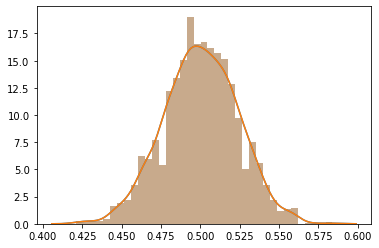

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
fix, ax = plt.subplots()
for sample in [sample_means_small, sample_means_large]:
  sns.distplot(sample)

In [0]:
def mean_moe(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean, margin_of_error

In [0]:
import scipy.stats


def confidence_interval(sample, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # NumPy Arrays are your friend
  sample = np.array(sample)
  # What is my estimate  - the mean
  mean = np.mean(sample)
  # Sample Size
  n = len(sample)
  # standard error
  # stderr = stats.sem(data)
  # I want the sample standard deviation
  stderr = np.std(sample, ddof=1) / np.sqrt(n)
  # Look up the t-statistic that contains 95% of possible sample means
  # within its bounds
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  # Margin Of Error
  margin_of_error = t * stderr
  return mean - margin_of_error, mean, mean + margin_of_error

In [85]:
df['crime'] = np.random.binomial(n=1, p=.5, size=435)
df['crime']

0      1
1      0
2      1
3      0
4      1
      ..
430    1
431    1
432    0
433    1
434    1
Name: crime, Length: 435, dtype: int64

In [88]:
from scipy import stats

df['crime'] = np.random.binomial(n=1, p=.5, size=435)

mean, margin_of_error = mean_moe(df['crime'])
print("mean", mean)
print("margin of error", margin_of_error)

mean 0.5333333333333333
margin of error 0.04706724723311491


In [90]:
df['crime'] = np.random.binomial(n=1, p=.5, size=435)

lower_bound, mean, upper_bound = confidence_interval(df['crime'])
print("lower bound:", lower_bound)
print("mean", mean)
print("upper bound:", upper_bound)

lower bound: 0.47702074082427204
mean 0.5241379310344828
upper bound: 0.5712551212446936


In [93]:
df = pd.DataFrame({'crime': df['crime']})

df.head()

,crime
0,1
1,1
2,1
3,0
4,1


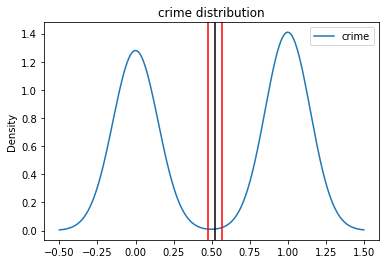

In [94]:
crime = np.random.binomial(n=1, p=.5, size=435)

CI = confidence_interval(crime)

df.plot.density()
plt.title("crime distribution")
plt.axvline(x=CI[0], color='red')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

-------------------------------------

In [0]:
from scipy.stats import t, ttest_1samp

In [97]:
import numpy as np

crime_means = []
for x in range(0,100):
  crime = np.random.binomial(n=1, p=.5, size=435)
  crime_means.append(crime.mean())

print(crime_means)

[0.5379310344827586, 0.5103448275862069, 0.5103448275862069, 0.49885057471264366, 0.5241379310344828, 0.503448275862069, 0.432183908045977, 0.5241379310344828, 0.45517241379310347, 0.5195402298850574, 0.4896551724137931, 0.496551724137931, 0.4942528735632184, 0.5287356321839081, 0.5172413793103449, 0.47126436781609193, 0.5126436781609195, 0.5517241379310345, 0.5195402298850574, 0.4827586206896552, 0.46206896551724136, 0.42758620689655175, 0.5149425287356322, 0.5195402298850574, 0.47586206896551725, 0.4735632183908046, 0.4896551724137931, 0.5655172413793104, 0.4850574712643678, 0.5057471264367817, 0.5218390804597701, 0.5471264367816092, 0.4804597701149425, 0.47586206896551725, 0.5264367816091954, 0.5011494252873563, 0.5195402298850574, 0.4804597701149425, 0.5264367816091954, 0.503448275862069, 0.503448275862069, 0.49885057471264366, 0.503448275862069, 0.4896551724137931, 0.49885057471264366, 0.5264367816091954, 0.5471264367816092, 0.4942528735632184, 0.5241379310344828, 0.49655172413793

In [98]:
# Sample Size
n = len(crime_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(crime_means)
# Sample Standard Deviation
sample_std = np.std(crime_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.495361093755377, 0.5060182165894503)


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)